In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-talk')

import datetime

import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle



In [4]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible.
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()

    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid.
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y

In [5]:
import requests, io
url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )

# data = np.load( 'particle_mini.npz' )
X, Y = data['X'], data['Y']
# The labels are 1 or 2. So we need to turn them into 0 and  1.
Y = (Y>1.5).astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

# data = pd.read_csv('particle-identification-from-detector-responses.zip', compression='zip')
# data.head()

In [6]:
from tensorflow import keras as ks

In [7]:
print(X_train.shape)
print( Counter(Y_train) )

(7142, 2)
Counter({np.int64(0): 4251, np.int64(1): 2891})


In [8]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(10, activation=ks.activations.relu, input_dim = 2)  )
model.add(ks.layers.Dense(15, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(10, activation=ks.activations.relu) )
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid)  )


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366 (1.43 KB)

 Trainable params: 366 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0.49427566],
       [0.49032924],
       [0.49379906]], dtype=float32)

In [11]:
model.compile( loss=ks.losses.binary_crossentropy  ,
              optimizer = ks.optimizers.SGD(.1) ,
              metrics = [ks.metrics.binary_accuracy] )


In [ ]:
## Let's try this for the particle identification
history = model.fit(X_train, Y_train,
                    epochs=15, batch_size=1500,
                    validation_data=(X_test, Y_test))

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - binary_accuracy: 0.5964 - loss: 0.6881 - val_binary_accuracy: 0.5724 - val_loss: 0.6803
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.5960 - loss: 0.6750 - val_binary_accuracy: 0.5724 - val_loss: 0.6727
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.5936 - loss: 0.6672 - val_binary_accuracy: 0.5724 - val_loss: 0.6683
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - binary_accuracy: 0.5993 - loss: 0.6604 - val_binary_accuracy: 0.5724 - val_loss: 0.6648
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.5980 - loss: 0.6564 - val_binary_accuracy: 0.5724 - val_loss: 0.6616
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.5988 - loss: 0.6526 - val_binary_accuracy: 0.5724 - val_loss: 0.6580
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - binary_accuracy: 0.5883 - loss: 0.6518 - val_binary_accuracy: 0.5724 - val_loss: 0.6536
Epoch 8/15
5/5 ━━━━━━━━━━━━

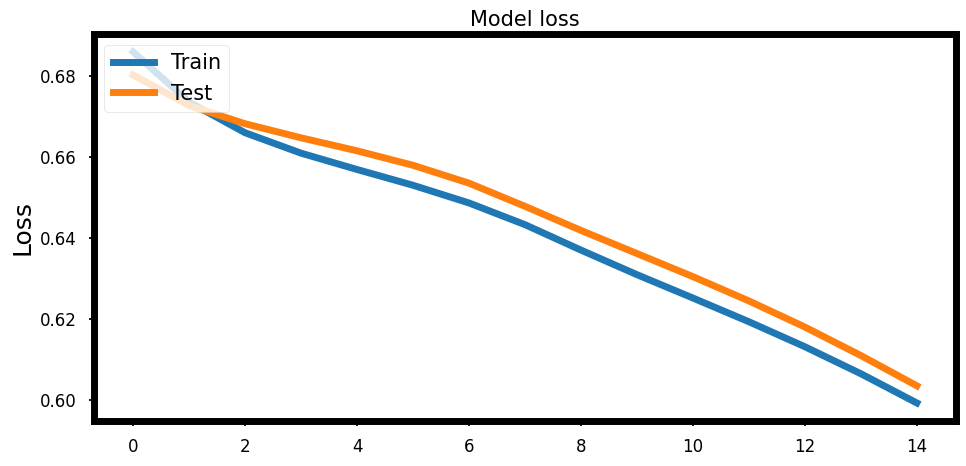

In [13]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))

# Plot training & validation loss values
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
#predictions of the model for test set
y_predict = (model.predict(X_test)>.5).astype(int)
#Model accuracy
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss)
print(accuracy)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.6034868359565735
0.5724485516548157


In [15]:
#predictions of the model for test set
y_predict = (model.predict(X_test)>.5).astype(int)
#Model accuracy
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss)
print(accuracy)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.6034868359565735
0.5724485516548157
